## Kruskal-Wallis Test

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scikit_posthocs as sp

In [3]:
path=os.getcwd()
data_path = os.path.join(path, 'data')
df=pd.read_csv(os.path.join(data_path, 'Terminos_lagoon_TA_DIC_2023_RawData.csv'))

columnas=[df.columns]

In [4]:
def kruskal_wallis_test(data, group_col, value_col, alpha=0.05):
    groups = [group[value_col].values for name, group in data.groupby(group_col)]
    result = kruskal(*groups)

    print(f'Statistic: {result.statistic}, p-value: {result.pvalue}')
    if result.pvalue < alpha:
        print("Reject the null hypothesis: The two groups have different distributions.")
    else:
        print("Fail to reject the null hypothesis: The two groups have similar distributions.")

In [5]:
def dunn_posthoc(data, group_col, value_col, alpha=0.05):
    posthoc = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust='bonferroni')
    print(posthoc)
    return posthoc

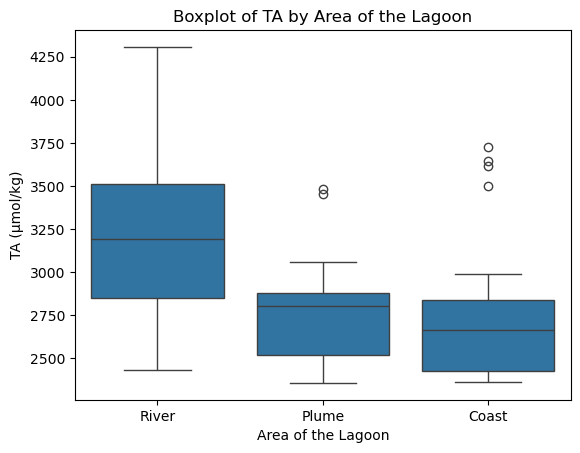

In [6]:
sns.boxplot(x='area', y='ta_micromol_kg', data=df)
plt.title('Boxplot of TA by Area of the Lagoon')
plt.xlabel('Area of the Lagoon')
plt.ylabel('TA (µmol/kg)')  
plt.show()

In [7]:
ta_river = df[df['area'] == 'River']['ta_micromol_kg']
ta_plume = df[df['area'] == 'Plume']['ta_micromol_kg']
ta_coast = df[df['area'] == 'Coast']['ta_micromol_kg']

In [ ]:
kruskal_wallis_test(df, 'area', 'ta_micromol_kg')

Statistic: 23.340675555846637, p-value: 8.543517259038796e-06
Reject the null hypothesis: The two groups have different distributions.


In [10]:
dunn_posthoc(df, 'area', 'ta_micromol_kg')

          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


## Respuesta de la tarea

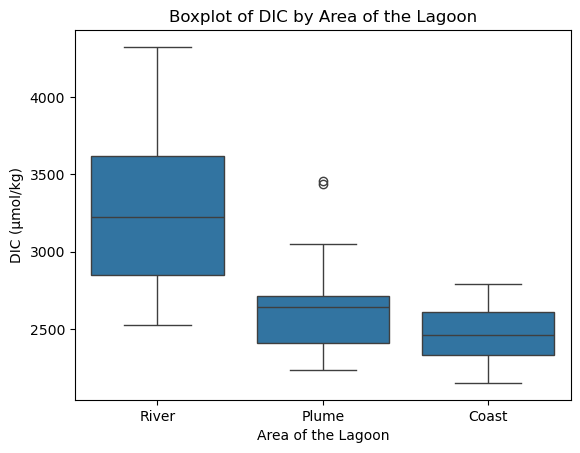

In [11]:
sns.boxplot(x='area', y='dic_micromol_kg', data=df)
plt.title('Boxplot of DIC by Area of the Lagoon')
plt.xlabel('Area of the Lagoon')
plt.ylabel('DIC (µmol/kg)')  
plt.show()

In [12]:
dic_river = df[df['area'] == 'River']['dic_micromol_kg']
dic_plume = df[df['area'] == 'Plume']['dic_micromol_kg']
dic_coast = df[df['area'] == 'Coast']['dic_micromol_kg']

In [14]:
kruskal_wallis_test(df, 'area', 'dic_micromol_kg')

Statistic: 55.889669058187486, p-value: 7.306553461098262e-13
Reject the null hypothesis: The two groups have different distributions.


In [13]:
dunn_posthoc(df, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00
